# TMDB (The Movie Database)

This dataset contains a collection of 150,000 TV shows from the TMDB database.

https://www.themoviedb.org/?language=en-US

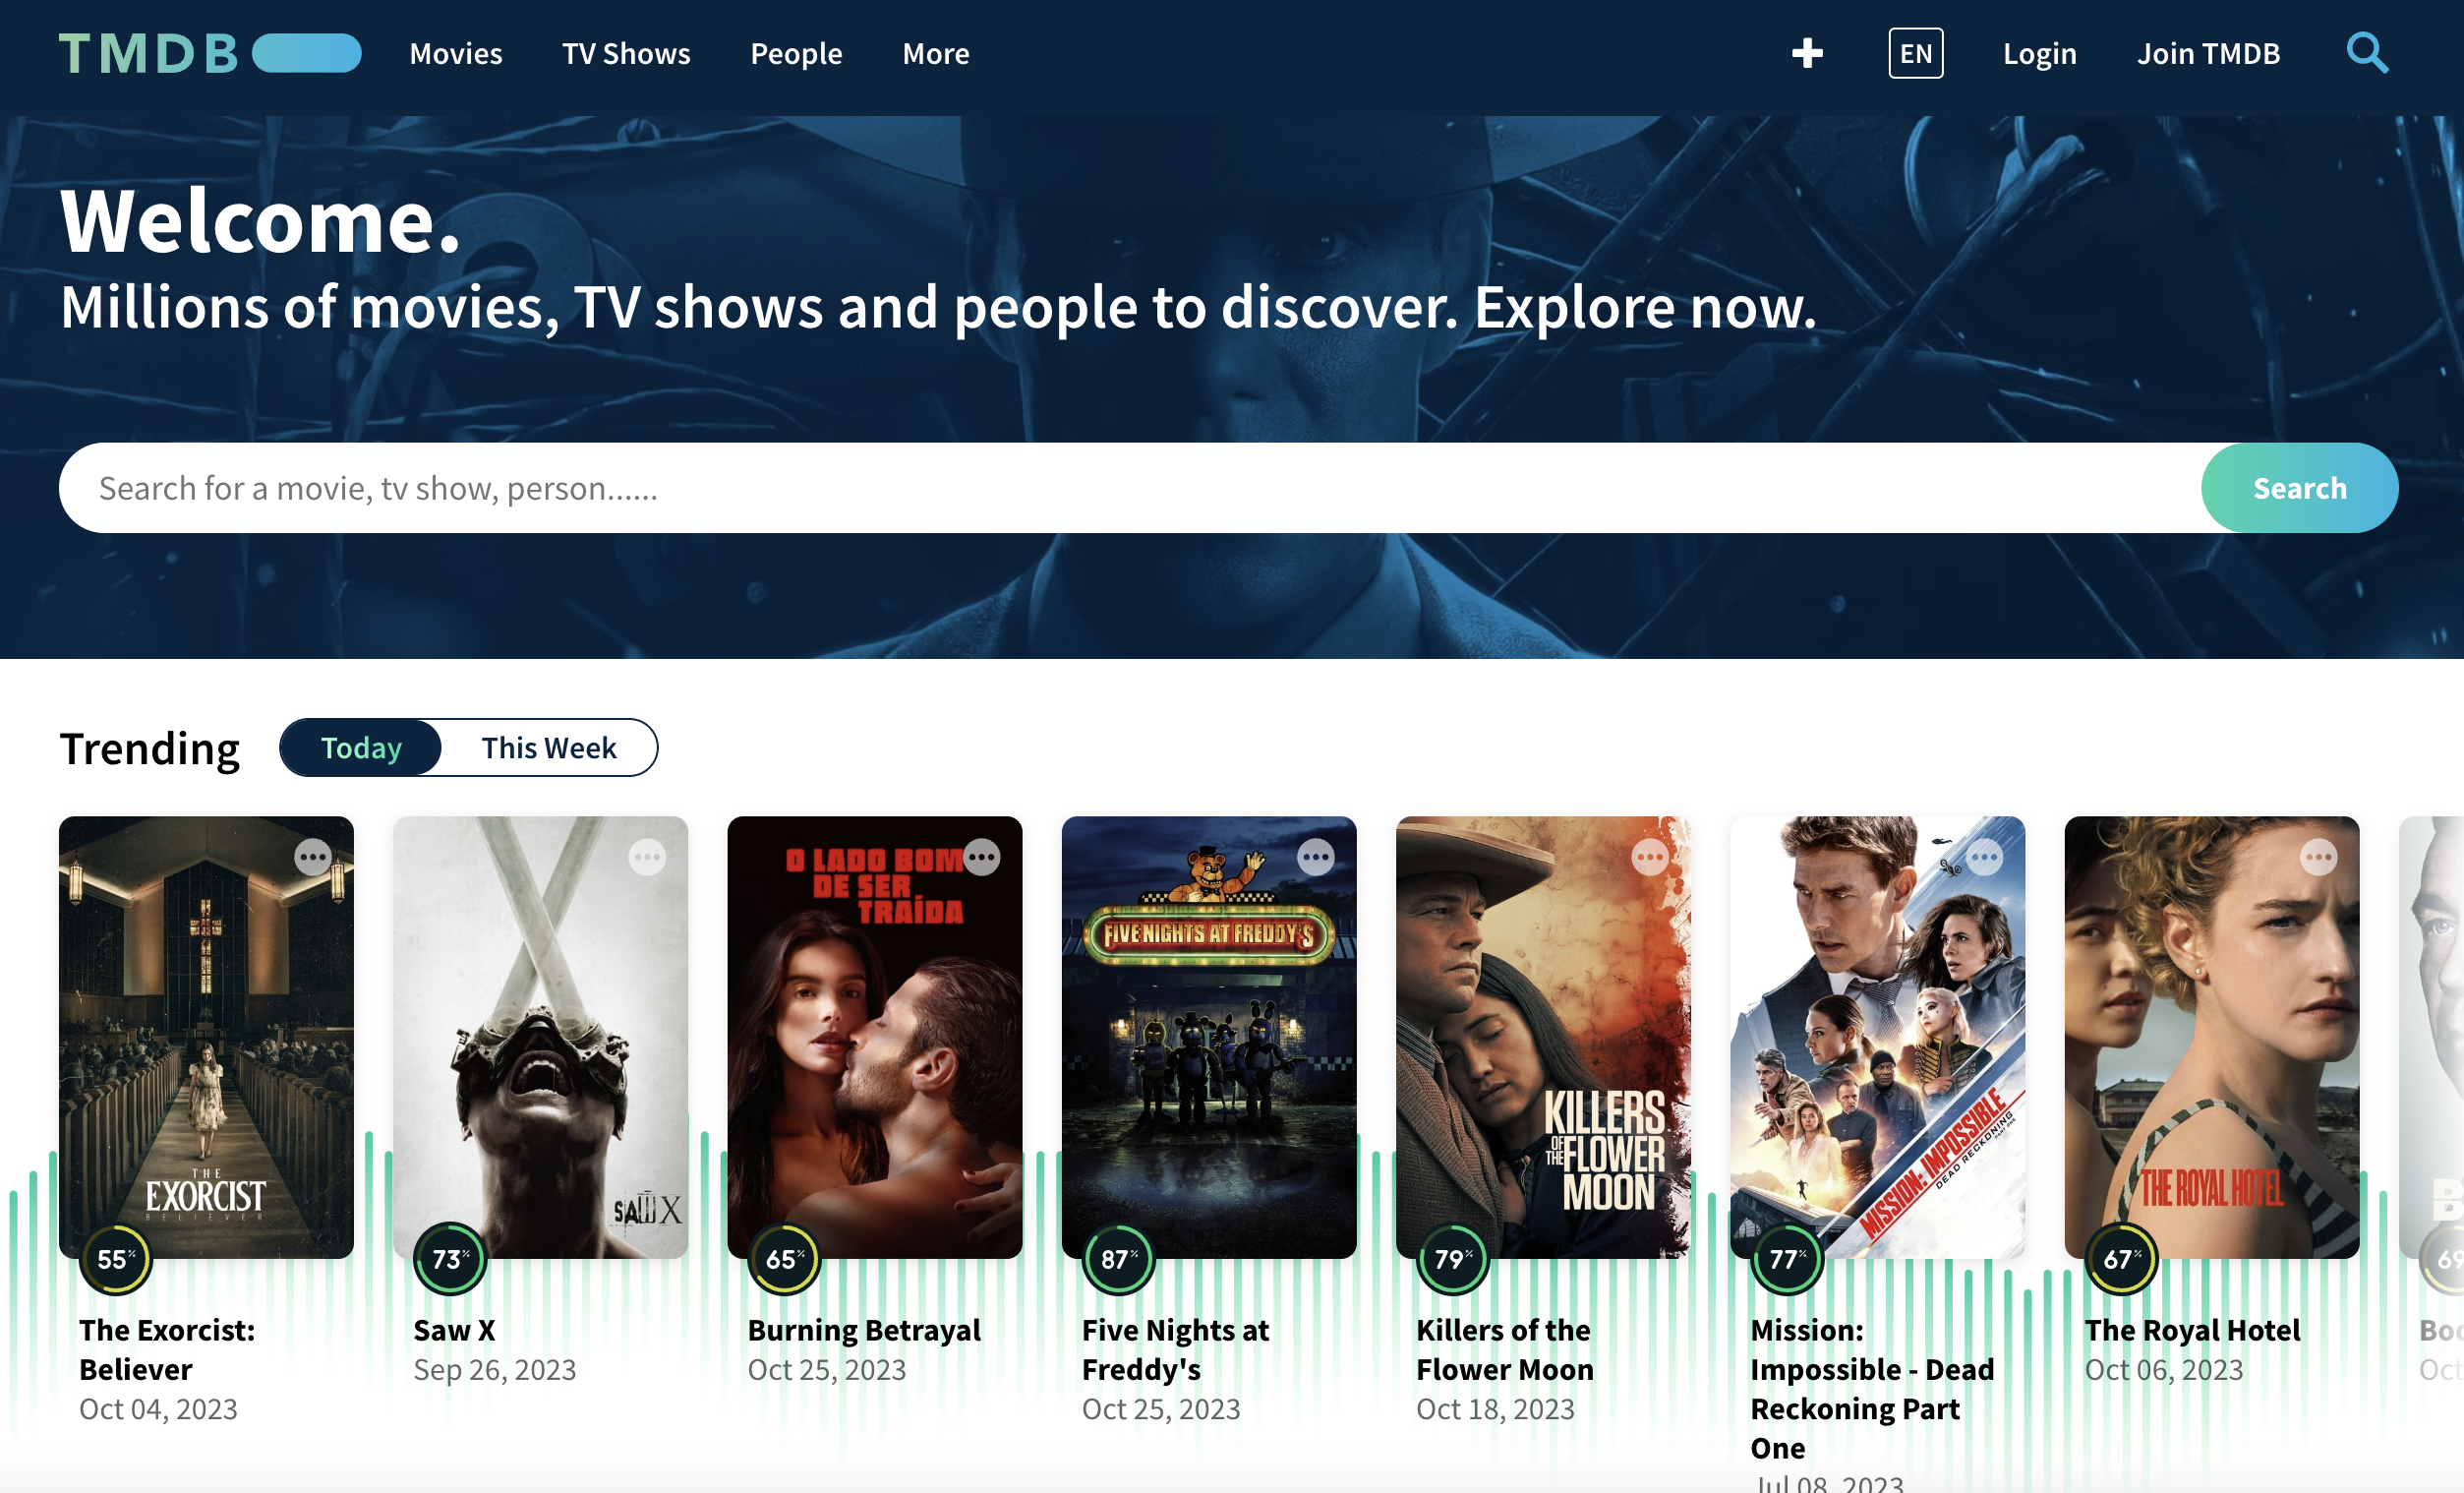



In [1]:
# library
import pandas as pd
import numpy as np
import datetime
import calendar
import timeit
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split
import datetime as dt
import re
from math import exp

Data Clean

In [2]:
# open data
data = pd.read_csv('TMDB dataset.csv')
data.head()

id              name  number_of_seasons  number_of_episodes  \
0   1399   Game of Thrones                  8                  73   
1  71446       Money Heist                  3                  41   
2  66732   Stranger Things                  4                  34   
3   1402  The Walking Dead                 11                 177   
4  63174           Lucifer                  6                  93   

  original_language  vote_count  vote_average  \
0                en       21857         8.442   
1                es       17836         8.257   
2                en       16161         8.624   
3                en       15432         8.121   
4                en       13870         8.486   

                                            overview  adult  \
0  Seven noble families fight for control of the ...  False   
1  To carry out the biggest heist in history, a m...  False   
2  When a young boy vanishes, a small town uncove...  False   
3  Sheriff's deputy Rick Grimes awakens from a co...  False   
4  Bored and unhappy as the Lord of Hell, Lucifer...  False   

                      backdrop_path  ...                           tagline  \
0   /2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg  ...                  Winter Is Coming   
1  /gFZriCkpJYsApPZEF3jhxL4yLzG.jpg  ...              The perfect robbery.   
2  /2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg  ...     Every ending has a beginning.   
3  /x4salpjB11umlUOltfNvSSrjSXm.jpg  ...  Fight the dead. Fear the living.   
4  /aDBRtunw49UF4XmqfyNuD9nlYIu.jpg  ...              It's good to be bad.   

                                        genres                 created_by  \
0  Sci-Fi & Fantasy, Drama, Action & Adventure  David Benioff, D.B. Weiss   
1                                 Crime, Drama                  Álex Pina   
2             Drama, Sci-Fi & Fantasy, Mystery   Matt Duffer, Ross Duffer   
3  Action & Adventure, Drama, Sci-Fi & Fantasy             Frank Darabont   
4                      Crime, Sci-Fi & Fantasy                Tom Kapinos   

   languages           networks  origin_country spoken_languages  \
0         en                HBO              US          English   
1         es  Netflix, Antena 3              ES          Español   
2         en            Netflix              US          English   
3         en                AMC              US          English   
4         en       FOX, Netflix              US          English   

                                production_companies  \
0  Revolution Sun Studios, Television 360, Genera...   
1                                    Vancouver Media   
2  21 Laps Entertainment, Monkey Massacre Product...   
3  AMC Studios, Circle of Confusion, Valhalla Mot...   
4  Warner Bros. Television, DC Entertainment, Jer...   

                       production_countries episode_run_time  
0  United Kingdom, United States of America                0  
1                                     Spain               70  
2                  United States of America                0  
3                  United States of America               42  
4                  United States of America               45  

[5 rows x 29 columns]

In [3]:
# drop all missing and NAN value
data.dropna(how='all', axis=1, inplace=True)
# no missing and NAN vaule
data.isna().sum()

id                           0
name                         5
number_of_seasons            0
number_of_episodes           0
original_language            0
vote_count                   0
vote_average                 0
overview                 69209
adult                        0
backdrop_path            84303
first_air_date           30024
last_air_date            27958
homepage                109186
in_production                0
original_name                5
popularity                   0
poster_path              56289
type                         0
status                       0
tagline                 153355
genres                   64087
created_by              123726
languages                53602
networks                 64588
origin_country           31014
spoken_languages         54310
production_companies    101971
production_countries     85010
episode_run_time             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158566 entries, 0 to 158565
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    158566 non-null  int64  
 1   name                  158561 non-null  object 
 2   number_of_seasons     158566 non-null  int64  
 3   number_of_episodes    158566 non-null  int64  
 4   original_language     158566 non-null  object 
 5   vote_count            158566 non-null  int64  
 6   vote_average          158566 non-null  float64
 7   overview              89357 non-null   object 
 8   adult                 158566 non-null  bool   
 9   backdrop_path         74263 non-null   object 
 10  first_air_date        128542 non-null  object 
 11  last_air_date         130608 non-null  object 
 12  homepage              49380 non-null   object 
 13  in_production         158566 non-null  bool   
 14  original_name         158561 non-null  object 
 15  

In [5]:
data.shape

(158566, 29)

In [7]:
data.describe()

id  number_of_seasons  number_of_episodes     vote_count  \
count  158566.000000      158566.000000       158566.000000  158566.000000   
mean   103087.369556           1.566761           25.388084      14.144300   
std     71300.480941           3.005675          138.793401     196.746395   
min         1.000000           0.000000            0.000000       0.000000   
25%     42967.250000           1.000000            1.000000       0.000000   
50%     91521.500000           1.000000            6.000000       0.000000   
75%    146110.750000           1.000000           20.000000       1.000000   
max    236368.000000         240.000000        20839.000000   21857.000000   

        vote_average     popularity  episode_run_time  
count  158566.000000  158566.000000     158566.000000  
mean        2.449529       5.920561         23.646381  
std         3.493419      40.589289         47.914734  
min         0.000000       0.000000          0.000000  
25%         0.000000       0.600000          0.000000  
50%         0.000000       0.866000          8.000000  
75%         6.000000       2.451000         43.000000  
max        10.000000    3707.008000       6032.000000